<a href="https://colab.research.google.com/github/Hank-777/Predictive-analytics/blob/Loan-Approval/Loan-Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

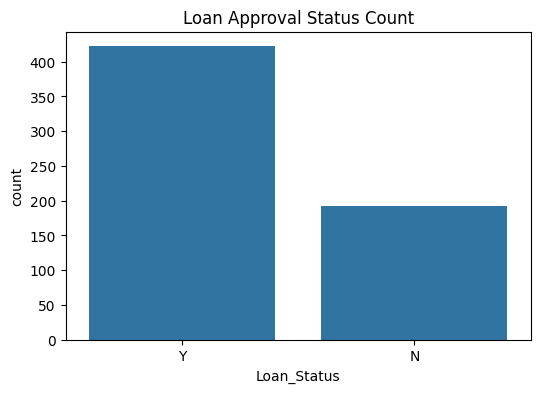

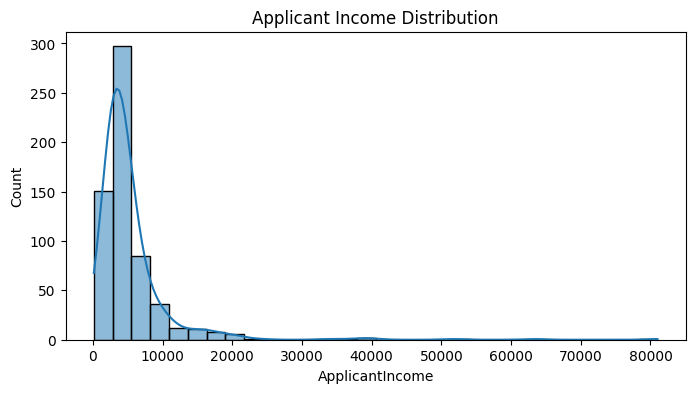

Accuracy: 0.7723577235772358
Classification Report:
               precision    recall  f1-score   support

           N       0.83      0.44      0.58        43
           Y       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



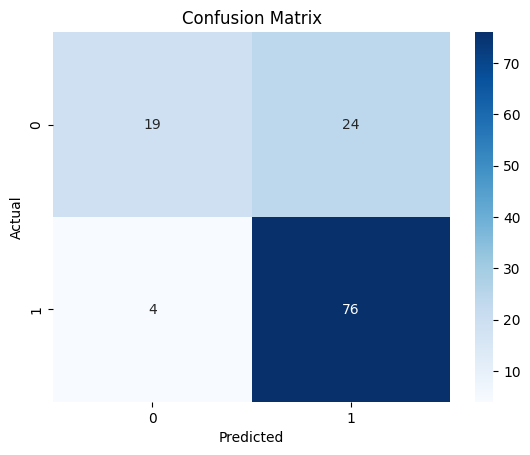

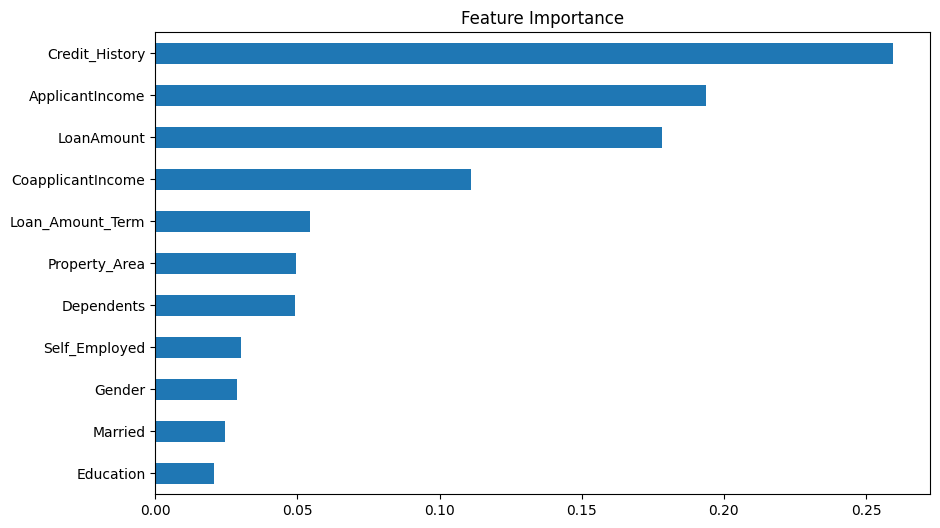

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df_train=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df_test=pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

# 3. EDA
print(df_train.head())
print(df_train.info())
print(df_train.describe())

# Visualizations
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df_train)
plt.title('Loan Approval Status Count')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df_train['ApplicantIncome'], kde=True, bins=30)
plt.title('Applicant Income Distribution')
plt.show()

# 4. Data Preprocessing
# Fill missing values
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0])
df_train['Dependents'] = df_train['Dependents'].fillna('0') # Fill missing Dependents with '0'


# Encode categorical variables
# Loan_Status is already encoded in a previous cell, so we exclude it here
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
label_encoders = {}

for col in categorical_cols:
    # Check if the column exists in df_train before encoding
    if col in df_train.columns:
        le = LabelEncoder()
        # Handle potential NaN values before encoding
        df_train[col] = le.fit_transform(df_train[col].astype(str))
        label_encoders[col] = le


# Drop irrelevant columns (if any like Loan_ID)
df_train.drop(columns=['Loan_ID'], errors='ignore', inplace=True)

# 5. Model Training
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 6. Evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()
